In [2]:
2+3

5

In [3]:
!pip install h5py

    100% |████████████████████████████████| 4.8MB 223kB/s eta 0:00:01


In [2]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima indians dataset
dataset = numpy.loadtxt("pimaIndians.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

Using TensorFlow backend.


In [3]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

In [5]:
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 78.26%


In [7]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
# later...
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [10]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 78.26%


In [12]:
# saving thy model to YAML
# serialize model to YAML
model_yaml = model.to_yaml() # meh.. thats it... to_yaml() instead of to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [14]:
from keras.models import model_from_yaml


# later...
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)# model_from_yaml() instead of model_from_json()
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [15]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 78.26%


## Checkpointing in keras
    Check point takes a snapshot..
    snapshot for each improivement
    or for the best model observed

In [17]:
from keras.callbacks import ModelCheckpoint


# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]


In [18]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list,verbose=0)

Epoch 00000: val_acc improved from -inf to 0.81102, saving model to weights-improvement-00-0.81.hdf5
Epoch 00001: val_acc improved from 0.81102 to 0.81890, saving model to weights-improvement-01-0.82.hdf5
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_acc did not improve
Epoch 00022: val_acc did not improve
Epoch 00023: val_a

In [19]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]
# Fit the model

In [20]:
model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, callbacks=callbacks_list,verbose=0)

Epoch 00000: val_acc improved from -inf to 0.76772, saving model to weights.best.hdf5
Epoch 00001: val_acc improved from 0.76772 to 0.77165, saving model to weights.best.hdf5
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc improved from 0.77165 to 0.77559, saving model to weights.best.hdf5
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc improved from 0.77559 to 0.78346, saving model to weights.best.hdf5
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_a

In [22]:
! ls 

finalized_model.sav	      processed.cleveland.data
housing.csv		      Procfile
housing.data		      __pycache__
iris.csv		      qiz3-axqb.csv
iris.data.csv		      README.md
LICENSE			      requirements.txt
manifest.yml		      Scores.txt
model.h5		      setup.py
model.json		      sieve
model.yaml		      sonar.all-data.csv
my_flask_app.py		      sonar.csv
OnlineRetail.csv.gz	      ufo-sightings-2016-02.csv
pimaIndians		      utils.py
pimaIndians.csv		      weights.best.hdf5
-pima-indians-diabetes.csv    weights-improvement-00-0.81.hdf5
pima-indians-diabetes.csv     weights-improvement-01-0.82.hdf5
prime_sieve.py		      world_bank.json.gz
processed.cleveland (1).data


In [23]:
# load weights
model.load_weights("weights.best.hdf5")
#using the bset model thus obtained above
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 80.08%


In [26]:
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)# the fitting verbose.. and etc.. is all stored in a variable called history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


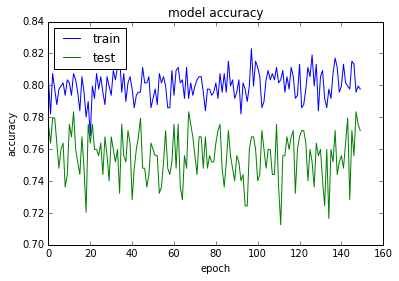

In [28]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

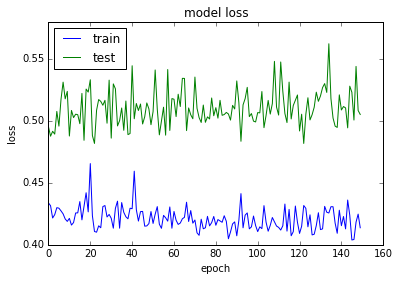

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
# model accuraccy.. plateaued.... hence no more training .. as it would be pointless
# the loss on training is lowe than test.. signs of overfitting to the training data set..?


In [31]:
# if the  loss decreases its a good sign...
# if the loss decreases more for the training than for the test.. as epochs increase.. 
# it might then be a good idea to stopt he training at an earlier epoch

## Drop out regularization to avoid overfitting...

In [32]:
# Baseline Model on the Sonar Dataset
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load dataset
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [33]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [34]:
# baseline
def create_baseline():
# create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.01, momentum=0.8, decay=0.0, nesterov=False) 
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [35]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=300,
batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


In [36]:
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 82.14% (7.30%)


In [44]:
from keras.layers import Dropout
from keras.constraints import maxnorm
# dropout in the input layer with weight constraint
def create_model():
# create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(60,))) # dropout being used in the visible layer/ input layer.. as a spearate layer all together..
    model.add(Dense(60, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3))) # max norm of the weights is 3:
    model.add(Dense(30, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False) # the LR is increased and so is the Momentum
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [45]:
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300,batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


In [46]:
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 86.02% (5.97%)


In [49]:
# dropout in hidden layers with weight constraint
def create_model_mid():
    # create model
    # dorpout layers are added in the middle...
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu',    kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))# o.2 as in.. drop put at random 20% of the weights.. drop put as in set thos eweights to 0.. with each weight update cycle.
    model.add(Dense(30, kernel_initializer='normal', activation='relu',    kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    # Compile model
    sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [50]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model_mid, epochs=300, batch_size=16,verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


In [51]:
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Hidden: 84.56% (9.19%)


a little besster  than base line.  

TIPS  
    use weights between 20 to 50 %... too low.. little learning effect too high.. under learning might happen   
    use drop outs on larger networks  
    use drop put on visible and hiddenlayers  
    use large LR and momentum.. LR increase by 10/100 and momentume is set to .9 /.99  